# Least Squares Approximation

We generate a random matrix $A$ and vector $b$, and find the least squares approximation to it (i.e., the vector $x$ such that $\lVert Ax-b \rVert_2$ is minimized).

In [20]:
import numpy as np
from time import perf_counter
from matplotlib import pyplot as plt
from tqdm import tqdm

In [21]:
dims = np.arange(100, 2000, step=50)

In [22]:
def ls(dims):
    times = []
    errors = []
    for n in tqdm(dims):
        m = 2 * n
    
        A = np.random.randn(m,n)
        b = np.random.randn(m,1)

        start = perf_counter()

        q,r = np.linalg.qr(A)
        qt = np.transpose(q)
        c = qt @ b

        rinv = np.linalg.inv(r)
        xls = rinv @ c

        end = perf_counter()
        times.append(end - start)
        errors.append(np.linalg.norm(A@xls - b))
    #for i in range(38):
      #  print(errors[i])   
    return times, errors

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:28<00:00,  1.33it/s]


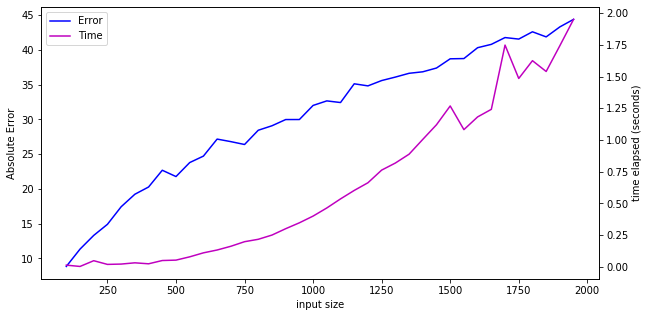

In [24]:
times, errors = ls(dims)
fig, ax = plt.subplots(figsize=(10,5))
#print(errors.shape)
ax.set_xlabel('input size')

lns1 = ax.plot(dims, errors, c= 'b', label='Error')
ax.set_ylabel('Absolute Error')
ax1=ax.twinx()
ax1.set_ylabel('time elapsed (seconds)')
lns2 = ax1.plot(dims,times, c = 'm', label = 'Time')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
#fig.legend(loc='upper right')

In [29]:
def rls(dims):    
    times = []
    errors = []
    iterations = 100
    for n in tqdm(dims):
        m = 2 * n
    
        A = np.random.randn(m,n)
        b = np.random.randn(m,1)
        def calc_norm(x):
            return np.linalg.norm(A@x - b)
        x_sol = np.random.randn(n,1)
        start = perf_counter()
        for i in range(iterations):
            x = np.random.randn(n,1)
            x_sol = min(x,x_sol,key = calc_norm)
        end = perf_counter()
        times.append(end - start)
        errors.append(np.linalg.norm(A@x_sol - b))
    return times, errors

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:22<00:00,  1.69it/s]


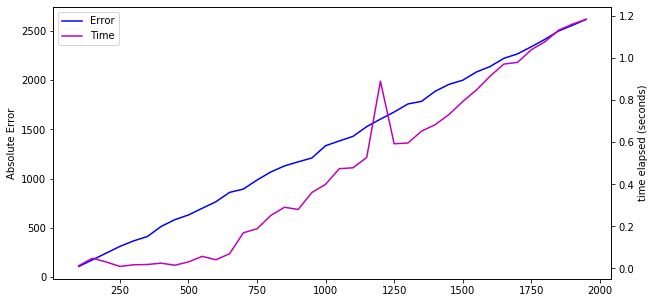

In [30]:
times2, errors2 = rls(dims)
fig, ax = plt.subplots(figsize=(10,5))

lns1 = ax.plot(dims, errors2, c= 'b', label='Error')
ax.set_ylabel('Absolute Error')
ax1=ax.twinx()
ax1.set_ylabel('time elapsed (seconds)')
lns2 = ax1.plot(dims,times2, c = 'm', label = 'Time')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)